In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle

In [2]:
final_p = np.array([-5.35, -0.93])
l =  2.7       #wheel_base
l_f =   0.89    # front_overhang
l_r=   1.1      # rear_overhang
r_min =   4.25   #minimum_turning_radius
w = 1.86         #car_width

In [3]:
s_1 = np.sqrt((l + l_f)**2 + 2*r_min*w)    

L1 = s_1 + l_r          # distance between two obstacle
print("Required total Parking length L1 = ",L1)

L2 = np.sqrt((r_min +(w/2))**2 + l_r**2) - (r_min-(w/2))      # min required width
print("Required total Parking width L2 = ",L2)


theta_a = np.arcsin((-final_p[0])/np.sqrt((-final_p[0])**2 + (final_p[1]+r_min)**2))
print("theta_a is = ", theta_a)
theta_b = np.arccos((r_min + (w/2))/np.sqrt((-final_p[0])**2 + (final_p[1]+r_min)**2))
print("theta_b is = ", theta_b)
theta_min = theta_a - theta_b
print("theta_min is = ", theta_min)


G_2 = np.array([final_p[0]+r_min*np.sin(theta_min), final_p[1]+r_min*(1-np.cos(theta_min))])
print("G_2= ", G_2)


o1g6 = r_min/np.cos(theta_b)
G_6 = np.array([final_p[0]+o1g6*np.sin(theta_a), final_p[1]+r_min-o1g6*np.cos(theta_a)])
print("G_6 = ",G_6)


g2g7 = np.sqrt(((-final_p[0])**2 + (final_p[1]+r_min)**2) - (r_min + (w/2))**2)
o1g7 = np.sqrt(r_min**2 + g2g7**2)
theta_c = np.arccos(r_min/o1g7)
theta_d = theta_min + theta_c
G_7 = np.array([final_p[0]+o1g7*np.sin(theta_d), final_p[1]+r_min-o1g7*np.cos(theta_d)])
print("G_7 =",G_7)


G_5 = np.array([G_7[0]+r_min*np.sin(theta_min), G_7[1]+r_min*(1-np.cos(theta_min))])
print("G_5 =",G_5)


H_min = G_5[1] - (w/2) 
print("H_min = ",H_min)

o_1 = np.array([final_p[0], final_p[1]+r_min])
print("Reference point final side=",o_1)
o_2 = np.array([G_5[0], G_5[1] - r_min])
print("Reference point starting side = ",o_2)


first_arc_l = r_min*theta_min
print("G1 to G2 arc length= ",first_arc_l)

second_arc_l = np.linalg.norm(G_2-G_7)
print("G2 to G7 arc length= ",second_arc_l )

print( "G7 to G5 arc length= ",first_arc_l)

total_arc_l = 2*first_arc_l + second_arc_l

print("total arc length G1 to G5= ",total_arc_l)

Required total Parking length L1 =  6.45706076127572
Required total Parking width L2 =  1.9755075299729294
theta_a is =  1.015395653741173
theta_b is =  0.6046699567901136
theta_min is =  0.4107256969510594
G_2=  [-3.65308221 -0.57653308]
G_6 =  [-0.96052124  0.59606178]
G_7 = [-0.37132554  0.85265312]
G_5 = [1.32559225 1.20612004]
H_min =  0.27612004491173636
Reference point final side= [-5.35  3.32]
Reference point starting side =  [ 1.32559225 -3.04387996]
G1 to G2 arc length=  1.7455842120420026
G2 to G7 arc length=  3.5794552658190875
G7 to G5 arc length=  1.7455842120420026
total arc length G1 to G5=  7.070623689903092


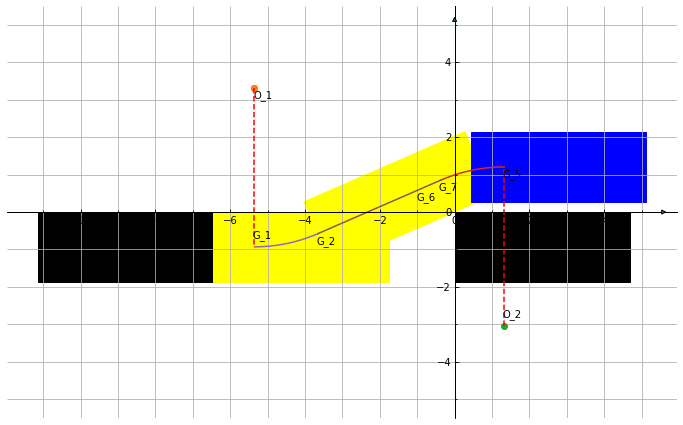

In [4]:
#ploting x and y axis
fig = plt.figure(figsize=(12, 12))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>, size=-1")
    ax.axis[direction].set_visible(True)
    
ax.add_patch(Rectangle((0, 0), (l+l_f+l_r), -w,color="black"))
ax.add_patch(Rectangle((-L1, 0),-(l+l_f+l_r), -w,color="black"))
ax.add_patch(Rectangle((-L1, 0), l+l_f+l_r, -w,color="yellow"))
ang = np.arctan((G_2[1]- G_6[1])/(G_2[0]-G_6[0]))
ang = (ang*180)/np.pi
ax.add_patch(Rectangle(G_2, l+l_f+l_r, w/2, angle = ang, color="yellow"))
ax.add_patch(Rectangle(G_2, l+l_f+l_r, -w/2, angle = ang, color="yellow"))
ax.add_patch(Rectangle((G_5[0]-l_f, G_5[1]), l+l_f+l_r, -w/2, color="blue"))
ax.add_patch(Rectangle((G_5[0]-l_f, G_5[1]), l+l_f+l_r, w/2, color="blue"))

spacing = 1
minorLocator = MultipleLocator(spacing)
ax.plot(o_1[0], o_1[1], marker='o')
# Set minor tick locations.
ax.yaxis.set_minor_locator(minorLocator)
ax.xaxis.set_minor_locator(minorLocator)
# Set grid to use minor tick locations. 
ax.grid(which = 'minor')
plt.gca().set_aspect('equal', adjustable='box')


X = np.linspace(-5,5, 200)
Y = np.linspace(-5, 5, 200)
x, y = np.meshgrid(X, Y)

plot = plt.plot(x, y, ls='none')
plot = plt.plot(o_1[0], o_1[1], marker='o')             #ploting o_1 center point

plot = plt.plot(o_2[0], o_2[1], marker='o')             #ploting o_2 center point

#plot curve
Angle1 = np.linspace((np.pi/2)+theta_min, np.pi/2, 150)

Gx2 = r_min*np.cos(Angle1) + o_2[0]
Gy2 = r_min*np.sin(Angle1) + o_2[1]
plot = plt.plot(Gx2, Gy2)                               #ploting last curve 


Angle2 = np.linspace(-(np.pi/2)+theta_min, -(np.pi/2), 150)
Gx1 = r_min*np.cos(Angle2) + o_1[0]
Gy1 = r_min*np.sin(Angle2) + o_1[1]
plot = plt.plot(Gx1, Gy1)                               #ploting first curve

Gx3 = [G_2[0], G_7[0]]
Gy3 = [G_2[1], G_7[1]]
plot = plt.plot(Gx3, Gy3)                               #ploting stright line

rx1 = [o_1[0], final_p[0]]
ry1 = [o_1[1], final_p[1]]
plot = plt.plot(rx1, ry1, linestyle='--', color='r')

rx2 = [o_2[0], G_5[0]]
ry2 = [o_2[1], G_5[1]]
plot = plt.plot(rx2, ry2, linestyle='--', color='r')

plt.text(o_1[0]-0.015, o_1[1]-0.25, "O_1")
plt.text(o_2[0]-0.050, o_2[1]+0.25, "O_2")
plt.text(final_p[0]-0.050, final_p[1]+0.25, "G_1")
plt.text(G_2[0]-0.050, G_2[1]-0.25, "G_2")
plt.text(G_6[0]-0.050, G_6[1]-0.25, "G_6")
plt.text(G_7[0]-0.050, G_7[1]-0.25, "G_7")
plt.text(G_5[0]-0.050, G_5[1]-0.25, "G_5")


plt.show()
